In [1]:
from scipy.io import loadmat
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from collections import Counter
from PyEMD import EEMD, EMD, Visualisation
import math
import pandas as pd

In [2]:
# 定义数据分布展示

def show_plot(data,show_num):
    data_list = []
    for a in data[:show_num]:
        data_list.append(a)#append函数会在数组后加上相应的元素
    return data_list

In [3]:
# 定义样本分割函数
def data_load(path,cut_num,shaft,label):
    """
    path：数据地址
    cut_num：每份样本数量
    shaft：轴，0为输入轴，3为中间轴
    label:数据标签
    """
    
    data = loadmat(path)
    # 返回list
    list_r = []
    # 原始数据
    data_X = data['data'][:,shaft]
    data_X = data_X.reshape(len(data_X),1)
    data_Y = data['data'][:,shaft+1]
    data_Y = data_Y.reshape(len(data_Y),1)
    data_Z = data['data'][:,shaft+2]
    data_Z = data_Z.reshape(len(data_Z),1)

    # 数据归一化
    # 归一化X
    scaler = MinMaxScaler()
#     scaler.fit(list_X)
    list_X_n = scaler.fit_transform(data_X)
    # 归一化Y
    scaler = MinMaxScaler()
#     scaler.fit(list_Y)
    list_Y_n = scaler.fit_transform(data_Y)
    # 归一化Z
    scaler = MinMaxScaler()
#     scaler.fit(list_Y)
    list_Z_n = scaler.fit_transform(data_Z)
    
    # 构建一维数组
    list_X = []
    for x in list_X_n:
        list_X.append(x[0])
        
    list_Y = []
    for y in list_Y_n:
        list_Y.append(y[0])

    list_Z = []
    for z in list_Z_n:
        list_Z.append(z[0])
        
    # 将x，y, z数据放入list
    for x,y,z in zip(list_X,list_Y,list_Z):
        list_r.append([x,y,z])
    
    data_cut = []
    label_cut = []
    
    # 分割数据
    for i in range(0,int(len(list_X_n)/cut_num)):
        data_cut.append(list_r[i * cut_num : (i+1) * cut_num])
        label_cut.append(label)
    return data_cut,label_cut

In [4]:
# 定义样本分割函数
def data_load_x(path,cut_num,shaft,label):
    """
    path：数据地址
    cut_num：每份样本数量
    shaft：轴，0为输入轴，3为中间轴
    label:数据标签
    """
    
    data = loadmat(path)
    # 返回list
    list_r = []
    # 原始数据
    data_X = data['data'][:,shaft]
    data_X = data_X.reshape(len(data_X),1)
#     data_Y = data['data'][:,shaft+1]
#     data_Y = data_Y.reshape(len(data_Y),1)
#     data_Z = data['data'][:,shaft+2]
#     data_Z = data_Z.reshape(len(data_Z),1)

    # 数据归一化
    # 归一化X
    scaler = MinMaxScaler()
#     scaler.fit(list_X)
    list_X_n = scaler.fit_transform(data_X)
    # 归一化Y
#     scaler = MinMaxScaler()
# #     scaler.fit(list_Y)
#     list_Y_n = scaler.fit_transform(data_Y)
#     # 归一化Z
#     scaler = MinMaxScaler()
# #     scaler.fit(list_Y)
#     list_Z_n = scaler.fit_transform(data_Z)
    
    # 构建一维数组
    list_X = []
    for x in list_X_n:
        list_X.append(x[0])
        
#     list_Y = []
#     for y in list_Y_n:
#         list_Y.append(y[0])

#     list_Z = []
#     for z in list_Z_n:
#         list_Z.append(z[0])
        
    # 将x，y, z数据放入list
    for x in list_X:
        list_r.append([x])
    
    data_cut = []
    label_cut = []
    
    # 分割数据
    for i in range(0,int(len(list_X_n)/cut_num)):
        data_cut.append(list_r[i * cut_num : (i+1) * cut_num])
        label_cut.append(label)
    return data_cut,label_cut

# label0: 正常轴承

In [5]:
data_0,label_0 = data_load_x('data/5-normal1-2000rpm-50Nm.mat',1000,0,0)

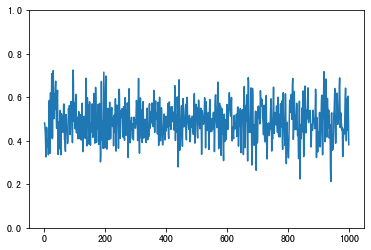

In [6]:
# 设置Y轴范围
plt.ylim(0,1)
show_x = data_0[0]
x = range(len(show_x))
plt.plot(x,show_x)

# label1: 输入轴减速器端轴承内滚道故障 2000rpm

In [7]:
data_1,label_1 = data_load_x('data/1-bearingfault_JSQ1-2000rpm-50Nm.mat',1000,3,1)

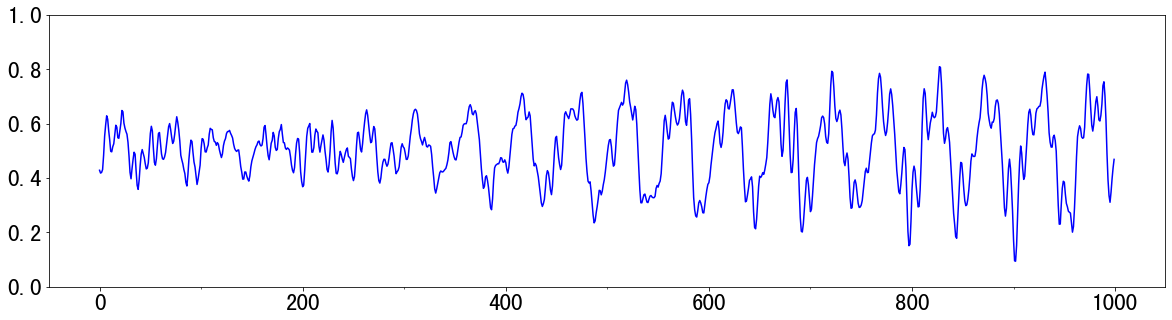

In [8]:
# 设置Y轴范围
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
plt.figure(figsize=(20,5))
plt.ylim(0,1)
ax = plt.gca()
ax.xaxis.set_minor_locator(MultipleLocator(100))
plt.tick_params(labelsize=23)
show_x = data_1[0]
x = range(len(show_x))
plt.plot(x,show_x,color='blue')

In [9]:
data_1_2000 = data_1
label_1_2000 = label_1
print("处理后内圈样本shape：",np.asarray(data_1_2000,dtype = 'float').shape)
print("label数：",len(label_1_2000))

处理后内圈样本shape： (960, 1000, 1)
label数： 960


['PLOT_HEIGHT_PER_IMF', 'PLOT_WIDTH', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_calc_inst_freq', '_calc_inst_phase', '_check_imfs', 'emd_instance', 'imfs', 'plot_imfs', 'plot_instant_freq', 'residue', 'show']


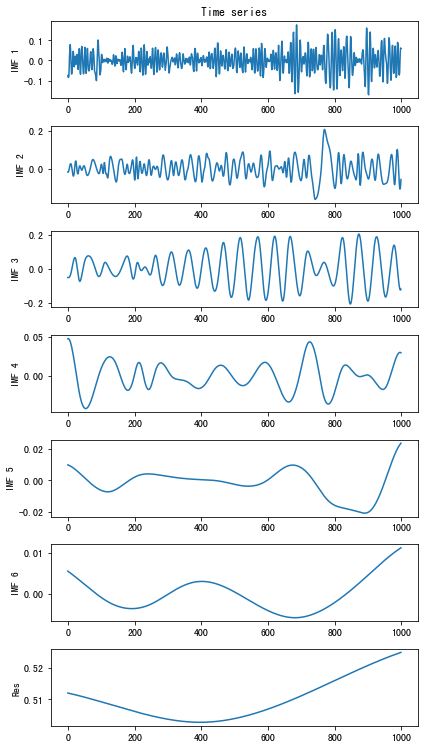

In [10]:
#EMD处理
emd = EMD()
emd.emd(np.asarray(data_1,dtype = 'float')[0,:,0])
imfs, res = emd.get_imfs_and_residue()
# 绘制 IMF
vis = Visualisation()
print(dir(vis))
vis.plot_imfs(imfs=imfs, residue=res, t=range(1000), include_residue=True)

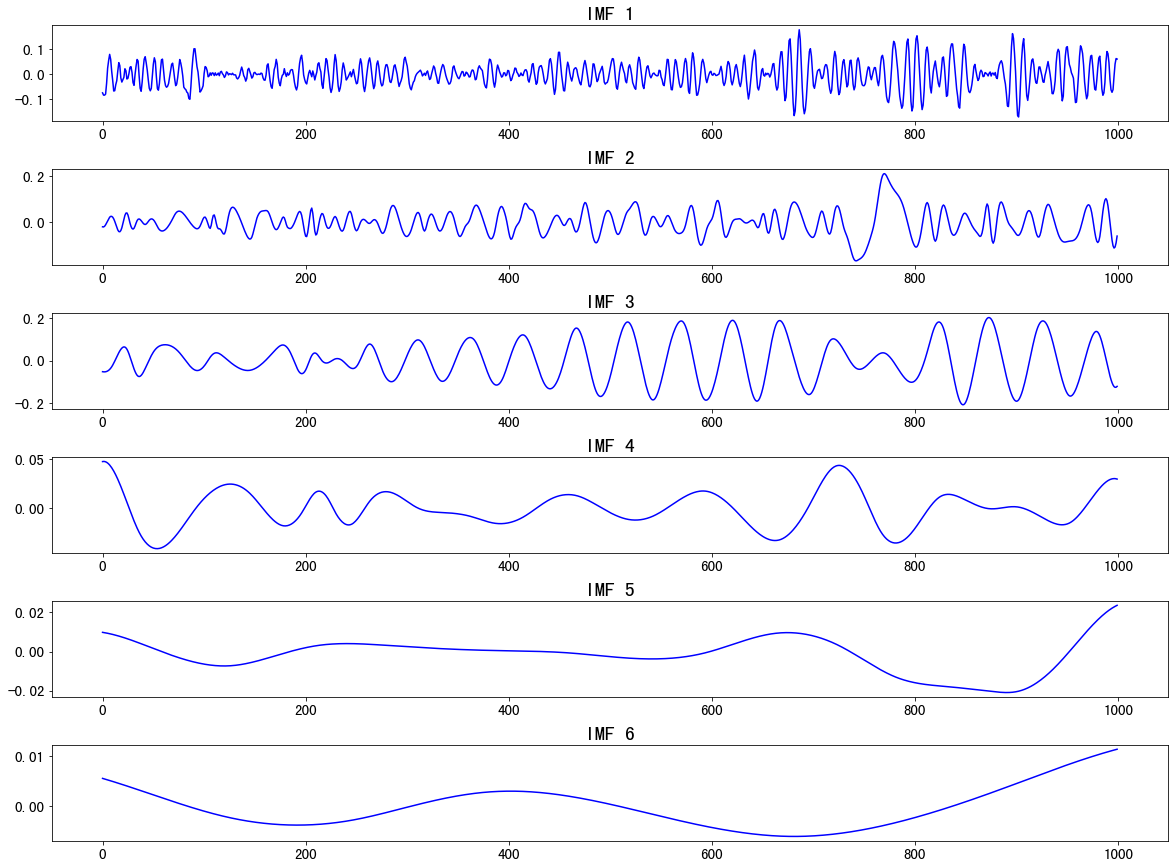

In [11]:
n = 1
plt.figure(figsize=(20,15))
plt.subplots_adjust(wspace = 0, hspace = 0.5)
for imf in imfs:
    plt.subplot(6,1,n)
    plt.tick_params(labelsize=15)
    plt.plot(range(1000), imf, color='blue')
    plt.title("IMF "+str(n),fontsize=20)
    plt.xlabel("")
    n += 1

In [27]:
pstf_list=[]
def  psfeatureTime(data):
    #有量纲
    #均值
    df_mean = sum(data) / len(data)
    #绝对均值
    df_absmean = sum(abs(data)) / len(data)
    #方根幅值
    df_r = pow(np.mean(np.sqrt(abs(data))),2)
    #均方根值
    df_rms = np.sqrt(np.mean(pow(data,2)))
    #峰值
    df_max = max(abs(data))
    #偏度值
    df_alpha = np.mean(pow(data,3))
    #峭度值
    df_beta = np.mean(pow(data,4))

    #无量纲
    #峰值因子
    df_cf = df_max/df_rms
    #脉冲因子
    df_if = df_max/df_absmean
    #裕度因子
    df_clf = df_max/df_r
    #波形因子
    df_sf = df_rms/df_absmean
    #偏度因子
    df_k3 = df_alpha/pow(df_rms,3)
    #峭度因子
    df_k4 = df_beta/pow(df_rms,4)
    
    feature={"IMF":[df_mean,df_absmean,df_r,df_rms,df_max,df_alpha,df_beta,"***************",df_cf,df_if,df_clf,df_sf,df_k3,df_k4]}
    df=pd.DataFrame(feature,index=["均值","绝对均值","方根幅值","均方根值","峰值","偏度值","峭度值","**********","峰值因子","脉冲因子","裕度因子","波形因子","偏度因子","峭度因子"] )
    return df

In [34]:
print("IMF1")
psfeatureTime(imfs[5])

IMF1


,IMF
均值,-0.000184
绝对均值,0.003343
方根幅值,0.002923
均方根值,0.004062
峰值,0.011318
偏度值,0.0
峭度值,0.0
**********,***************
峰值因子,2.786181
脉冲因子,3.385513


In [14]:
# import numpy as np
# from scipy import stats

# data = imfs[0]
# Xr = np.mean(np.sqrt(abs(data)))*np.mean(np.sqrt(abs(data)))
# Xmean = np.mean(abs(data))
# Xrms = np.sqrt(np.dot(data,data)/len(data))
# Xp = max(max(data), -min(data))

# print('均方根值：',Xrms)
# print('峰值指标：',Xp);
# print('峰值因子：',Xp/Xrms)
# print('峭度因子：',stats.kurtosis(data))
# print('峰度因子：',stats.skew(data))
# print('方根幅度：',Xr)
# print('裕度系数：',Xp/Xr)
# print('绝对平均值：',Xmean)
# print('脉冲因子：',Xp/np.mean(abs(data)))
# print('波形指标：',Xrms/Xmean)
# print('方差为：',np.var(data))
# print('标准差为：',np.std(data))

均方根值： 0.049914455465815986
峰值指标： 0.17668700725738865
峰值因子： 3.5397963497446767
峭度因子： 0.8574171584674812
峰度因子： 0.0033186189374921457
方根幅度： 0.030296521470575707
裕度系数： 5.831923887004285
绝对平均值： 0.03748159611350649
脉冲因子： 4.713967001894018
波形指标： 1.3317057073732599
方差为： 0.0024899753069080664
标准差为： 0.04989965237261745


# label2: 输入轴电机端轴承内滚道故障 2000rpm

In [15]:
data_2,label_2 = data_load_x('data/2-bearingfault_DJ1-2000rpm-50Nm.mat',1000,6,2)

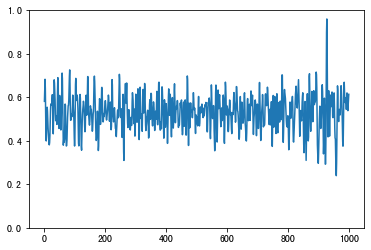

In [16]:
# 设置Y轴范围
plt.ylim(0,1)
show_x = data_2[0]
x = range(len(show_x))
plt.plot(x,show_x)

# label3: 中间轴减速器端轴承滚子故障1 2000rpm

In [17]:
data_3,label_3 = data_load_x('data/3-bearingfault_JSQ1-2000rpm-50Nm.mat',1000,0,3)

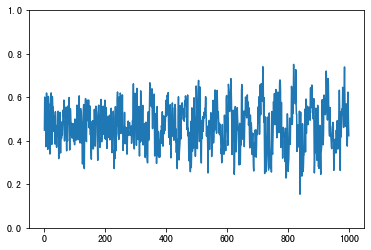

In [18]:
# 设置Y轴范围
plt.ylim(0,1)
show_x = data_3[0]
x = range(len(show_x))
plt.plot(x,show_x)

# label4: 中间轴减速器端轴承滚子故障2 2000rpm

In [19]:
data_4,label_4 = data_load_x('data/3-bearingfault_JSQ2-2000rpm-50Nm.mat',1000,0,4)

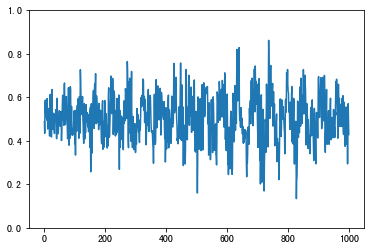

In [20]:
# 设置Y轴范围
plt.ylim(0,1)
show_x = data_4[0]
x = range(len(show_x))
plt.plot(x,show_x)

In [21]:
data_train = np.asarray(data_0[:900] + data_1[:900] + data_2[:900] + data_3[:900] + data_4[:900],dtype = 'float64')
label = np.asarray(label_0[:900] + label_1[:900] + label_2[:900] + label_3[:900] + label_4[:900],dtype = 'int64')

print("处理后样本shape：",data_train.shape)
print("处理后数据类别分布：",Counter(label))

# 保存数据
np.save("train_data/train_data_2000.npy",data_train)
np.save("train_data/label_2000.npy",label)
print("数据保存成功，位置：/train_data/")

处理后样本shape： (4500, 1000, 1)
处理后数据类别分布： Counter({0: 900, 1: 900, 2: 900, 3: 900, 4: 900})
数据保存成功，位置：/train_data/
